In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(num_samples):
    images = []
    labels = []
    for _ in range(num_samples):
        img = np.zeros((50, 50), dtype=np.float32)
        x, y = np.random.randint(0, 50), np.random.randint(0, 50)
        img[x, y] = 255
        images.append(img)
        labels.append((x, y))
    return np.array(images), np.array(labels)

# Generate dataset
num_samples = 10000
X, y = generate_data(num_samples)


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

def create_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(50, 50, 1)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(2)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

model = create_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 135424)            0         
                                                                 
 dense (Dense)               (None, 128)               17334400  
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 17353474 (66.20 MB)
Trainable params: 17353474 (66.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
# Prepare data for training
X = X[..., np.newaxis]  # Add channel dimension
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)


Epoch 1/20
250/250 [==============================] - 162s 642ms/step - loss: 32.5881 - val_loss: 3.8182
Epoch 2/20
250/250 [==============================] - 154s 618ms/step - loss: 2.6467 - val_loss: 1.7232
Epoch 3/20
250/250 [==============================] - 160s 639ms/step - loss: 1.5072 - val_loss: 0.9980
Epoch 4/20
250/250 [==============================] - 166s 659ms/step - loss: 0.9065 - val_loss: 1.0734
Epoch 5/20
250/250 [==============================] - 155s 619ms/step - loss: 0.9560 - val_loss: 1.0074
Epoch 6/20
250/250 [==============================] - 158s 633ms/step - loss: 0.8709 - val_loss: 0.9294
Epoch 7/20
250/250 [==============================] - 166s 664ms/step - loss: 0.9335 - val_loss: 0.7423
Epoch 8/20
250/250 [==============================] - 154s 616ms/step - loss: 0.6346 - val_loss: 0.6094
Epoch 9/20
250/250 [==============================] - 154s 617ms/step - loss: 0.7632 - val_loss: 0.6455
Epoch 10/20
250/250 [==============================] - 154s 618

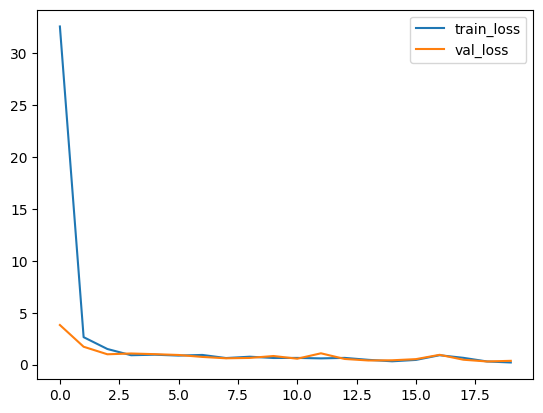

63/63 [==============================] - 9s 140ms/step


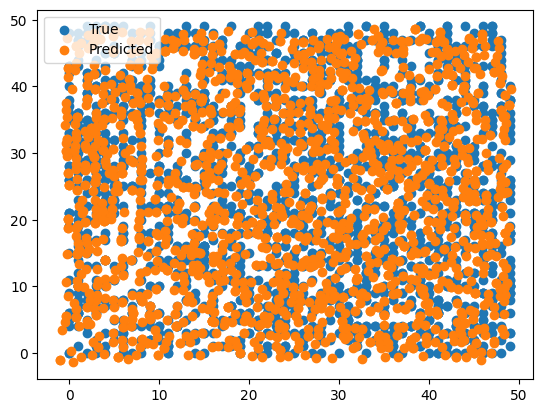

In [5]:
# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Predict and compare with ground truth
y_pred = model.predict(X_val)
plt.scatter(y_val[:, 0], y_val[:, 1], label='True')
plt.scatter(y_pred[:, 0], y_pred[:, 1], label='Predicted')
plt.legend()
plt.show()
